**TEST PROJET LANDMINING DETECTION**

Machine learning test 1

In [4]:
import pandas as pd

# Import des données
file_path = '/Users/debidour/Desktop/ENSC/PERSONNEL/3A/Landmining_project_ENSC/Mine_Dataset.csv'

# Lire le dataset
mine_data = pd.read_csv(file_path)

# Visualiser les premières lignes
mine_data.head()

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

mine_data = shuffle(mine_data, random_state=42)

# Découpage des features (V, H, S) et de la cible (M)
X = mine_data[['V', 'H', 'S']]  # Input features: Voltage, Height, Soil type
y = mine_data['M']  # Target: Mine type

# Normaliser les features (Voltage, Height)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Découpage des data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((270, 3), (68, 3), (270,), (68,))

In [8]:
# Import des librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset
data = pd.read_csv('/Users/debidour/Desktop/ENSC/PERSONNEL/3A/Landmining_Project_ENSC/Mine_Dataset.csv')

# Prétraitement 
data.fillna(0, inplace=True)

# Séparation des features (X) et de la variable cible (y)
X = data.drop(columns=['target'])  # Remplace 'target' par le nom réel de la variable cible
y = data['target']

# Division en sets d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle de régression logistique
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Prédiction
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

KeyError: "['target'] not found in axis"

Machine learning test 2

In [13]:
# Affiche les noms des colonnes pour identifier la colonne cible
print(data.columns)

Index(['V', 'H', 'S', 'M'], dtype='object')


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate a classification report
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, report_rf


(0.4852941176470588,
 '              precision    recall  f1-score   support\n\n           1       0.77      0.77      0.77        13\n           2       0.88      0.94      0.91        16\n           3       0.14      0.18      0.16        11\n           4       0.44      0.24      0.31        17\n           5       0.13      0.18      0.15        11\n\n    accuracy                           0.49        68\n   macro avg       0.47      0.46      0.46        68\nweighted avg       0.51      0.49      0.49        68\n')

Premières lignes du dataset :
             0            1  2  3
0            V            H  S  M
1  0.338156758            0  0  1
2  0.320241334  0.181818182  0  1
3   0.28700875  0.272727273  0  1
4  0.256283622  0.454545455  0  1

Types des données avant correction :
0    object
1    object
2    object
3    object
dtype: object

Valeurs manquantes par colonne :
V    1
H    1
S    1
M    1
dtype: int64

Rapport de classification pour la régression logistique :
              precision    recall  f1-score   support

         1.0       0.56      0.86      0.68        21
         2.0       0.85      0.85      0.85        20
         3.0       0.29      0.56      0.38        18
         4.0       0.14      0.05      0.07        21
         5.0       0.25      0.09      0.13        22

    accuracy                           0.47       102
   macro avg       0.42      0.48      0.42       102
weighted avg       0.42      0.47      0.42       102


Rapport de classification pour le Random F

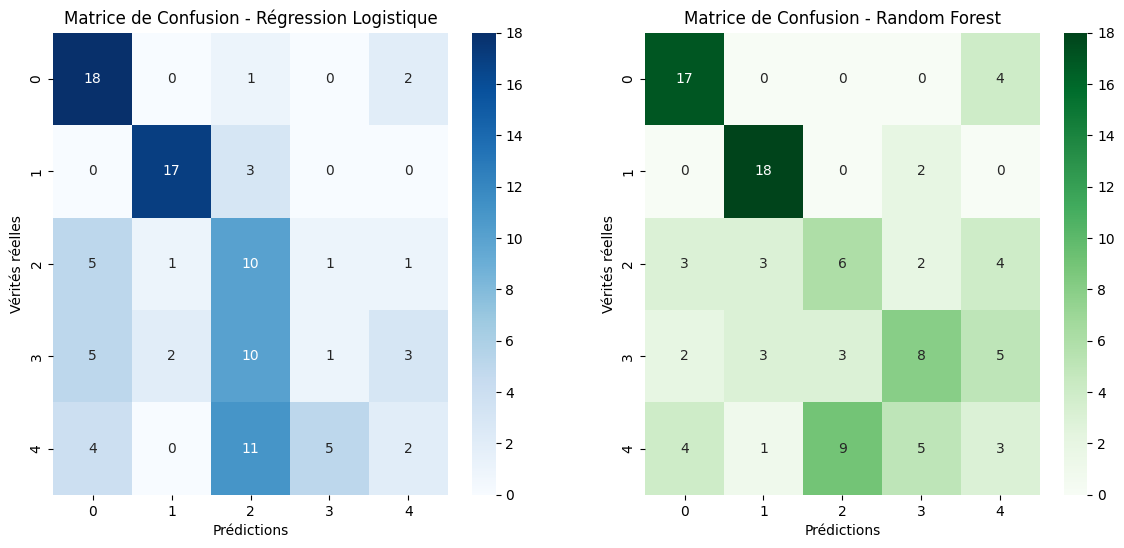

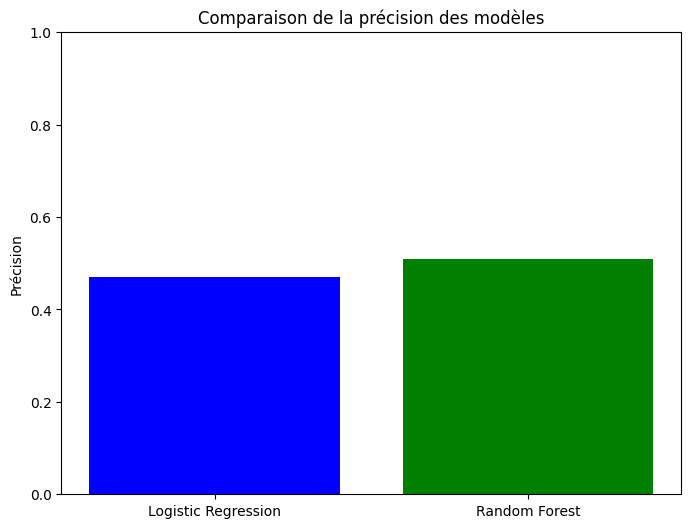

In [7]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Chargement des données
data = pd.read_csv('/Users/debidour/Desktop/ENSC/PERSONNEL/3A/Landmining_project_ENSC/Mine_Dataset.csv', header=None)

# Vérification des premières lignes du jeu de données
print("Premières lignes du dataset :")
print(data.head())

# Vérification du type des données dans chaque colonne
print("\nTypes des données avant correction :")
print(data.dtypes)

# Définir les noms de colonnes, selon l'image fournie (V: Voltage, H: Height, S: Soil Type, M: Mine Type)
data.columns = ["V", "H", "S", "M"]

# Conversion explicite des colonnes en types numériques
data['V'] = pd.to_numeric(data['V'], errors='coerce')
data['H'] = pd.to_numeric(data['H'], errors='coerce')
data['S'] = pd.to_numeric(data['S'], errors='coerce')
data['M'] = pd.to_numeric(data['M'], errors='coerce')

# Vérification des valeurs manquantes (NaN) après conversion
print("\nValeurs manquantes par colonne :")
print(data.isna().sum())

# Suppression des lignes contenant des valeurs manquantes
data = data.dropna()

# 2. Séparation des features (X) et de la variable cible (y)
X = data[["V", "H", "S"]]
y = data["M"]

# 3. Division en sets d'entraînement et de test (70% entraînement, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Création et entraînement de modèles de Machine Learning
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# 6. Prédictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf_clf = rf_clf.predict(X_test_scaled)

# 7. Évaluation des modèles
print("\nRapport de classification pour la régression logistique :")
print(classification_report(y_test, y_pred_log_reg))

print("\nRapport de classification pour le Random Forest :")
print(classification_report(y_test, y_pred_rf_clf))

# 8. Matrice de confusion pour chaque modèle
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_rf_clf = confusion_matrix(y_test, y_pred_rf_clf)

# Affichage des matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matrice de Confusion - Régression Logistique')
axes[0].set_xlabel('Prédictions')
axes[0].set_ylabel('Vérités réelles')

sns.heatmap(conf_matrix_rf_clf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matrice de Confusion - Random Forest')
axes[1].set_xlabel('Prédictions')
axes[1].set_ylabel('Vérités réelles')

plt.show()

# 9. Comparaison des performances avec des barres de précision
accuracy_log_reg = log_reg.score(X_test_scaled, y_test)
accuracy_rf_clf = rf_clf.score(X_test_scaled, y_test)

# Affichage des résultats de précision
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_log_reg, accuracy_rf_clf]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.title("Comparaison de la précision des modèles")
plt.ylabel("Précision")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Fully Connected Neural Network
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(3,)),  # Input layer (3 features)
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')  # Output layer pour 5 classes (Mine types)
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Évaluer le modèle
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

test_accuracy
